In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler

In [2]:
cancer = load_breast_cancer()

In [3]:
features = pd.DataFrame(cancer.data,columns=cancer.feature_names)
target = pd.Series(cancer.target)

In [4]:
features.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
features.shape

(569, 30)

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [8]:
model = Sequential([
    Dense(200,activation='relu',input_shape=(None,30)),
    Dropout(0.3),
    Dense(70,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam')

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 200)         6200      
_________________________________________________________________
dropout (Dropout)            (None, None, 200)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 70)          14070     
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           71        
Total params: 20,341
Trainable params: 20,341
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(scaled_features,target,epochs=5,validation_split=0.2)

Epoch 1/5
15/15 [==============================] - 0s 12ms/step - loss: 0.4635 - val_loss: 0.2257
Epoch 2/5
15/15 [==============================] - 0s 4ms/step - loss: 0.1723 - val_loss: 0.1152
Epoch 3/5
15/15 [==============================] - 0s 3ms/step - loss: 0.1177 - val_loss: 0.0981
Epoch 4/5
15/15 [==============================] - 0s 4ms/step - loss: 0.0841 - val_loss: 0.0915
Epoch 5/5
15/15 [==============================] - 0s 3ms/step - loss: 0.0772 - val_loss: 0.0926


In [13]:
loss_df = pd.DataFrame(model.history.history)

<AxesSubplot:>

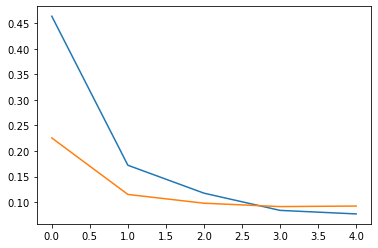

In [14]:
loss_df['loss'].plot()
loss_df['val_loss'].plot()